<a href="https://colab.research.google.com/github/AlexR9AZ/Python_mix/blob/main/CIFAR_100_(%D0%91%D0%BE%D0%BD%D1%83%D1%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-100

Датасет [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) (Canadian Institute For Advanced Research) содержит 60 000 цветных изображений размером 32 на 32 пикселя. На каждом из этих изображений есть объект одного из 100 классов. Таким образом, на каждый класс приходится по 600 картинок (500 из них - на train выборке, 100 - на test).

CIFAR-100 - один из самых популярных датасетов для решения задачи классификации с помощью компьютерного зрения.

# План действий



1.   Импортируем все необходимые библиотеки и функции;
2.   Загрузим датасет CIFAR-100 и подготовим его к передаче в нейронную сеть;
3.   Возьмем архитектуру нейронной сети, которую мы использовали для решения задачи классификации на датасете MNIST;
4.   Обучим сеть на датасете CIFAR-100;
5.   Интерпретируем полученные результаты.




#Imports

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # функция "разбиения" выборки на train и test
from  skimage import transform # функция, чтобы сделать картинки побольше
import numpy as np

In [ ]:
import keras
from keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Input, Dense, AveragePooling2D, GlobalAveragePooling2D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau 
import tensorflow as tf

# Выгрузка данных

In [ ]:
n_classes = 10
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

n_training = X_train.shape[0]
n_testing = X_test.shape[0]

y_train = y_train.flatten()
y_test  = y_test.flatten()

print('Размерность train выборки:', X_train.shape) 
print('Размерность test выборки:', X_test.shape)



Размерность train выборки: (50000, 32, 32, 3)
Размерность test выборки: (10000, 32, 32, 3)


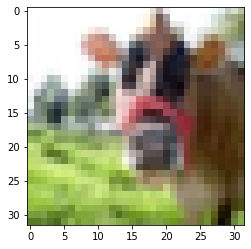

In [ ]:
plt.imshow(X_train[0])
plt.show()

# Нормализуем данные

In [ ]:
X_train = (X_train).astype('float32') / 255.0 
X_test = (X_test).astype('float32') / 255.0 

# Подготовим данные для нейронной сети

In [ ]:
# new_shape = (224, 224, 3)
# X_train = np.asarray([transform.resize(image, new_shape) for image in X_train])
# X_test = np.asarray([transform.resize(image, new_shape) for image in X_test])

In [ ]:
# эту ячейку мы используем, так как хотим подавать в сеть картинки размером 32 на 32

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# Создадим модель

Обучим модель, используя архитектуру сети, которую мы написали для датасета MNIST.

In [ ]:
BATCH_SIZE = 64
NUM_CLASSES = 100
EPOCHS = 10
INPUT_SIZE = (32, 32, 3)

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CLASSES)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
model = Sequential()

#Первый conv-conv-pool блок
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
#Второй conv-conv-pool блок
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

#Третий conv-conv-pool блок
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))
          
#Голова сети
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'softmax'))

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

In [ ]:
reduce_on_plateau = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,y_train, batch_size = BATCH_SIZE),
                        epochs = EPOCHS, 
                        validation_data = (X_validation, y_validation),
                        verbose = 1, 
                        steps_per_epoch = X_train.shape[0] // BATCH_SIZE, 
                        callbacks=[reduce_on_plateau])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
625/625 [==============================] - 22s 30ms/step - loss: 4.3436 - accuracy: 0.0377 - val_loss: 3.9318 - val_accuracy: 0.0876
Epoch 2/10
625/625 [==============================] - 18s 29ms/step - loss: 3.8437 - accuracy: 0.1097 - val_loss: 3.6168 - val_accuracy: 0.1528
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 3.5394 - accuracy: 0.1614 - val_loss: 3.3792 - val_accuracy: 0.1983
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 3.3282 - accuracy: 0.2004 - val_loss: 3.0913 - val_accuracy: 0.2472
Epoch 5/10
625/625 [==============================] - 19s 30ms/step - loss: 3.1590 - accuracy: 0.2318 - val_loss: 2.9016 - val_accuracy: 0.2759
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 3.0510 - accuracy: 0.2542 - val_loss: 2.8487 - val_accuracy: 0.2837
Epoch 7/10
625/625 [==============================] - 18s 29ms/step - loss: 2.9559 - accuracy: 0.2704 - val_loss: 2.7662 - val_accuracy:

Обратите внимание, что на протяжении всего обучения loss падал. Это значит, что наша сеть действительно училась, просто ей не хватило времени для того, чтобы полностью обучиться и достигнуть хорошей метрики accuracy (на 10 эпохах она составляла 0.3). 

Таким образом, для начала можно попробовать увеличить количество эпох (EPOCHS) на обучении.

# Возможные улучшения



*   Усложнение архитектуры сети;
*   Использование fine-tuning;
*   Больше эпох на обучении.

